In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [80]:
# Read CSV
df = pd.read_csv("loan.csv")

C:\Users\raghu\AppData\Local\Temp\ipykernel_20084\3604610096.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [81]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [82]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.shape

(39717, 111)

In [84]:
# checking of percentage of null values for all coumns
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [85]:
# Remving all columns what have 100% Null values
df.dropna(how='all', axis=1, inplace=True)

In [86]:
# checking for null values again
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

Columns with null values based on percentage
1. desc - 33.0
2. mths_since_last_delinq - 65.0
3. mths_since_last_record - 93.0
4. next_pymnt_d - 97.0
5. pub_rec_bankruptcies - 2.0
Those columns that have null values more than 30% can be dropped


In [87]:
df = df.loc[:, df.isnull().mean() < 0.3]

In [88]:
# checking for null values again
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

pub_rec_bankruptcies has 2.0 null values -> Number of public record bankruptcies
This will not effect whether a person whose has taken loan will default or not
So this column can be dropped

In [89]:
df.drop(['pub_rec_bankruptcies'], axis=1, inplace=True)

In [90]:
# checking for null values again
round(df.isnull().sum(axis = 0)/len(df), 2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

emp_title                     6.0
emp_length                    3.0
These two columns have some missing values which is very less

In [91]:
# Check the most frequently occuring value in emp_title
df['emp_title'].mode()

0    US Army
Name: emp_title, dtype: object

In [92]:
# Since missing percentage is very less using mode to replace missing values is reasonable
df['emp_title'].fillna(df['emp_title'].mode()[0], inplace=True)

In [93]:
df['emp_title'].isnull().values.any()

False

According to data dictionary of column emp_length -> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. So we need to fix this column 

In [94]:
df['emp_length'] = df['emp_length'].str.rstrip('years ').str.rstrip('year ')
df['emp_length'].replace({'10+': '10'}, inplace=True)
df['emp_length'][df['emp_length'] == '< 1'] = '0'

C:\Users\raghu\AppData\Local\Temp\ipykernel_20084\3858685099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'][df['emp_length'] == '< 1'] = '0'


In [95]:
# dropping rows that have null values in emp_length
df.dropna(subset=['emp_length'], inplace=True)

In [96]:
df['emp_length'].head()

0    10
1     0
2    10
3    10
4     1
Name: emp_length, dtype: object

In [97]:
df['emp_length'].tail()

39712    4
39713    3
39714    0
39715    0
39716    0
Name: emp_length, dtype: object

In [98]:
# It is better to have column which is year as int
df['emp_length'].astype('int')

0        10
1         0
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38642, dtype: int32

In [99]:
# lets check for unique values
df.nunique()

id                            38642
member_id                     38642
loan_amnt                       880
funded_amnt                    1038
funded_amnt_inv                8097
term                              2
int_rate                        371
installment                   15149
grade                             7
sub_grade                        35
emp_title                     28775
emp_length                       11
home_ownership                    5
annual_inc                     5100
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           38642
purpose                          14
title                         19148
zip_code                        822
addr_state                       50
dti                            2863
delinq_2yrs                      11
earliest_cr_line                515
inq_last_6mths                    9
open_acc                    

In [100]:
# If there are unique values our analysis will be biased and will not make sense. So removing all unique values
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)
        

In [101]:
df.nunique()

id                            38642
member_id                     38642
loan_amnt                       880
funded_amnt                    1038
funded_amnt_inv                8097
term                              2
int_rate                        371
installment                   15149
grade                             7
sub_grade                        35
emp_title                     28775
emp_length                       11
home_ownership                    5
annual_inc                     5100
verification_status               3
issue_d                          55
loan_status                       3
url                           38642
purpose                          14
title                         19148
zip_code                        822
addr_state                       50
dti                            2863
delinq_2yrs                      11
earliest_cr_line                515
inq_last_6mths                    9
open_acc                         40
pub_rec                     

Removing columns that don't affect analysis of loan lending
 1.  id
 2.  member_id
 3.  verification_status
 4.  url
 5.  zip_code
 6.  collections_12_mths_ex_med
 7. chargeoff_within_12_mths
 8. tax_liens
 9. title
 10. total_rec_prncp
 11. total_rec_int
 12. total_rec_late_fee
 13. recoveries
 14. collection_recovery_fee
 15. last_pymnt_amnt
 16. revol_bal

In [102]:
df.drop(labels = ['id', 'member_id', 'verification_status', 'url', 'zip_code', 
                    'collections_12_mths_ex_med', 
                    'chargeoff_within_12_mths', 'tax_liens', 'title', 'total_rec_prncp', 
                    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                    'last_pymnt_amnt', 'revol_bal'],
          axis = 1, inplace = True
         )

In [103]:
df.shape

(38642, 30)

In [104]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [105]:
df.drop(df[df['loan_status'] == 'Current'].index, inplace = True)

# Univariate Analysis

On Loan amount

C:\Users\raghu\AppData\Local\Temp\ipykernel_20084\4088476212.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.loan_amnt, rug=True)


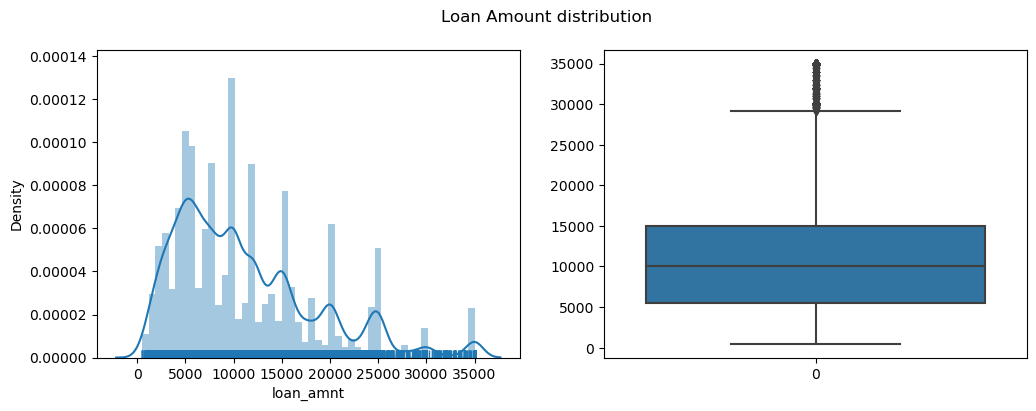

In [106]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=df.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

Observations : The highest number of times the loan amount taken is 10000 and vert few people took loan amount of 30000 and above

Univariate Analysif on funded amount


C:\Users\raghu\AppData\Local\Temp\ipykernel_20084\2990075210.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.funded_amnt, rug=True)


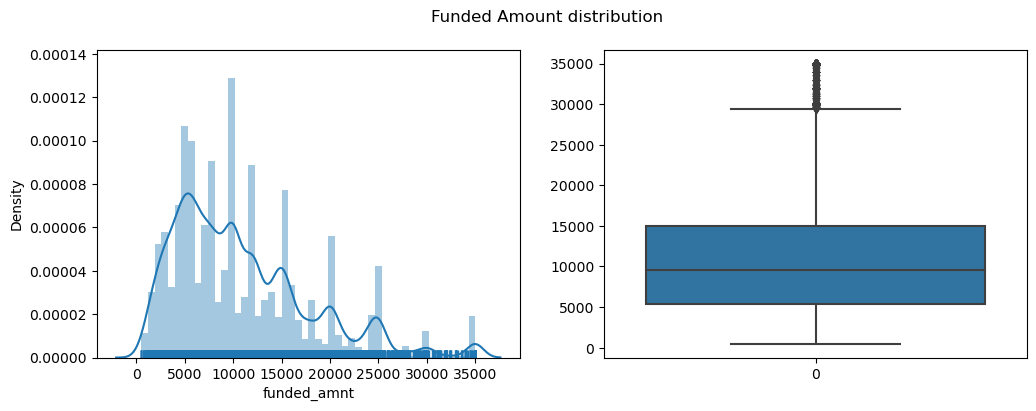

In [107]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=df.funded_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df.funded_amnt)
#Single title for both subplots.
plt.suptitle('Funded Amount distribution')
plt.show()

Observations: It looks the same as above. 10000 is the amount that is given as loan most times Again 30000 loan amount is given very few times


Univariate Analysis on funded amount by investors


C:\Users\raghu\AppData\Local\Temp\ipykernel_20084\3552951761.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.funded_amnt_inv, rug=True)


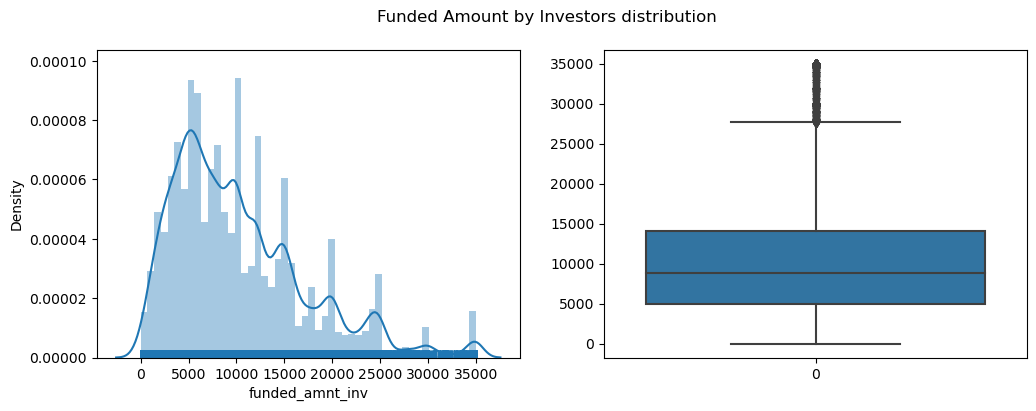

In [108]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=df.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=df.funded_amnt_inv)
#Single title for both subplots.
plt.suptitle('Funded Amount by Investors distribution')
plt.show()

Observations : Majority of the amount invested by investors is between 5000 and 10000 and very few in 25000 to 280000 and there is no amount invested between 30000 and 33000. No amount invested beyond 35000

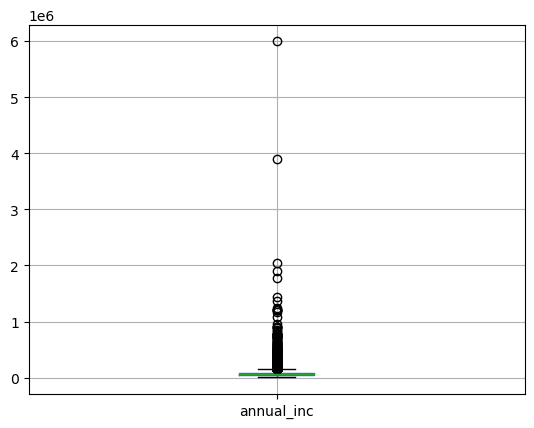

In [110]:
df.boxplot(column='annual_inc')
plt.show()

Annual Income seems to have outliers which needs to be removed. Annual Income can affect the loan amount to be provided


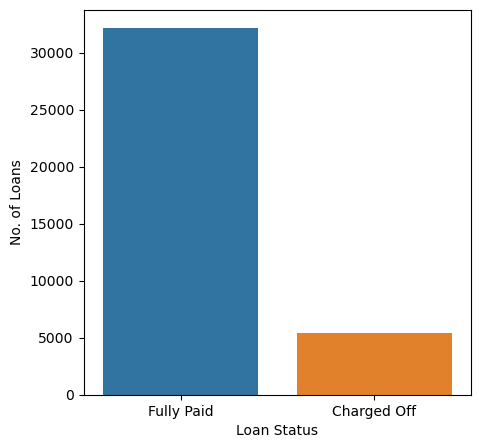

In [111]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=df)
ax.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

We have remvoed current status as it does not effect the laodn status approval.
Also we observer majority of is full paid and there are around 5000 and odd numbers which charged off

<Axes: >

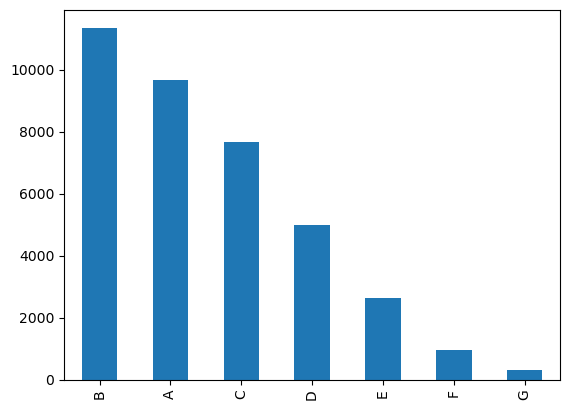

In [40]:
df['grade'].value_counts().plot(kind='bar')

Majority of grades of loan are of B type followed by a,c,d,e,f and g. G grade loan is the least here

<Axes: >

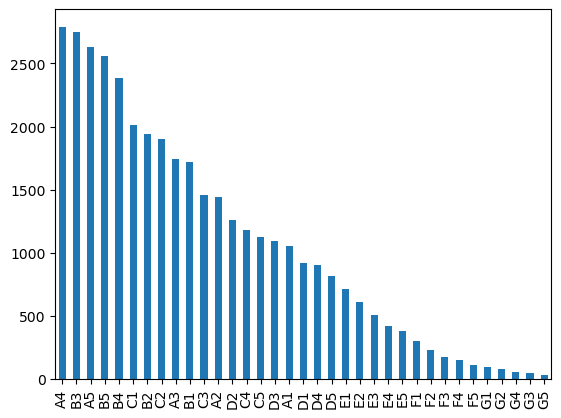

In [41]:
df['sub_grade'].value_counts().plot(kind='bar')

It folows similar pattern as above. A4 has the highest grade for approved loans.

<Axes: >

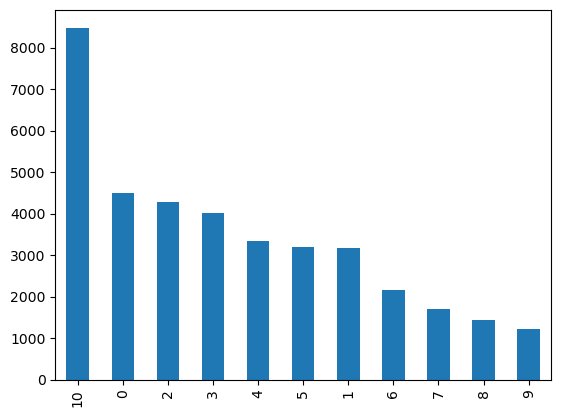

In [42]:
df['emp_length'].value_counts().plot(kind='bar')

Majority of the loan takes have employment length of 10 years or more. There are people whose employment tenure ie less than a year indicated by 0. Employment Tenure will also help banks decide whether to loan or not as this may indicate stability and more the tenure income will steadily increase.



0    24000.0
1    30000.0
2    12252.0
3    49200.0
5    36000.0
Name: annual_inc, dtype: float64